In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/Leishmania_donovani_model_dataset_MACCS.csv')

In [ ]:
df

Name  FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  ...  FP1016  \
0       CHEMBL1000    0    0    0    0    0    0    0    0    0  ...       1   
1     CHEMBL100210    0    0    1    1    1    1    0    0    0  ...       1   
2     CHEMBL100740    0    0    1    1    1    0    0    0    0  ...       1   
3       CHEMBL1043    0    0    0    0    0    0    0    0    0  ...       1   
4        CHEMBL106    0    0    0    0    0    0    0    0    0  ...       0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
4828     CHEMBL991    0    1    0    1    0    1    1    0    0  ...       0   
4829   CHEMBL99340    0    0    1    1    1    1    0    0    0  ...       1   
4830   CHEMBL99679    0    0    0    0    0    0    0    0    0  ...       1   
4831   CHEMBL99717    0    0    1    1    1    1    0    0    0  ...       1   
4832   CHEMBL99929    0    0    1    1    1    1    0    0    0  ...       1   

      FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  FP1024     class  
0          0       0       0       0       0       0       0       0  inactive  
1          1       1       1       1       0       1       0       0  inactive  
2          1       1       1       1       0       1       0       0  inactive  
3          0       0       0       0       0       0       0       0  inactive  
4          0       0       0       0       0       0       1       0  inactive  
...      ...     ...     ...     ...     ...     ...     ...     ...       ...  
4828       0       0       0       0       0       0       1       0  inactive  
4829       1       1       1       1       0       1       0       0  inactive  
4830       0       0       0       0       0       0       0       0  inactive  
4831       1       1       1       1       0       1       0       0  inactive  
4832       1       1       1       1       0       1       0       0  inactive  

[4833 rows x 1026 columns]

In [ ]:
df2=df.drop(['Name','class'],axis=1)

In [ ]:
df2

In [ ]:
X=df2.values

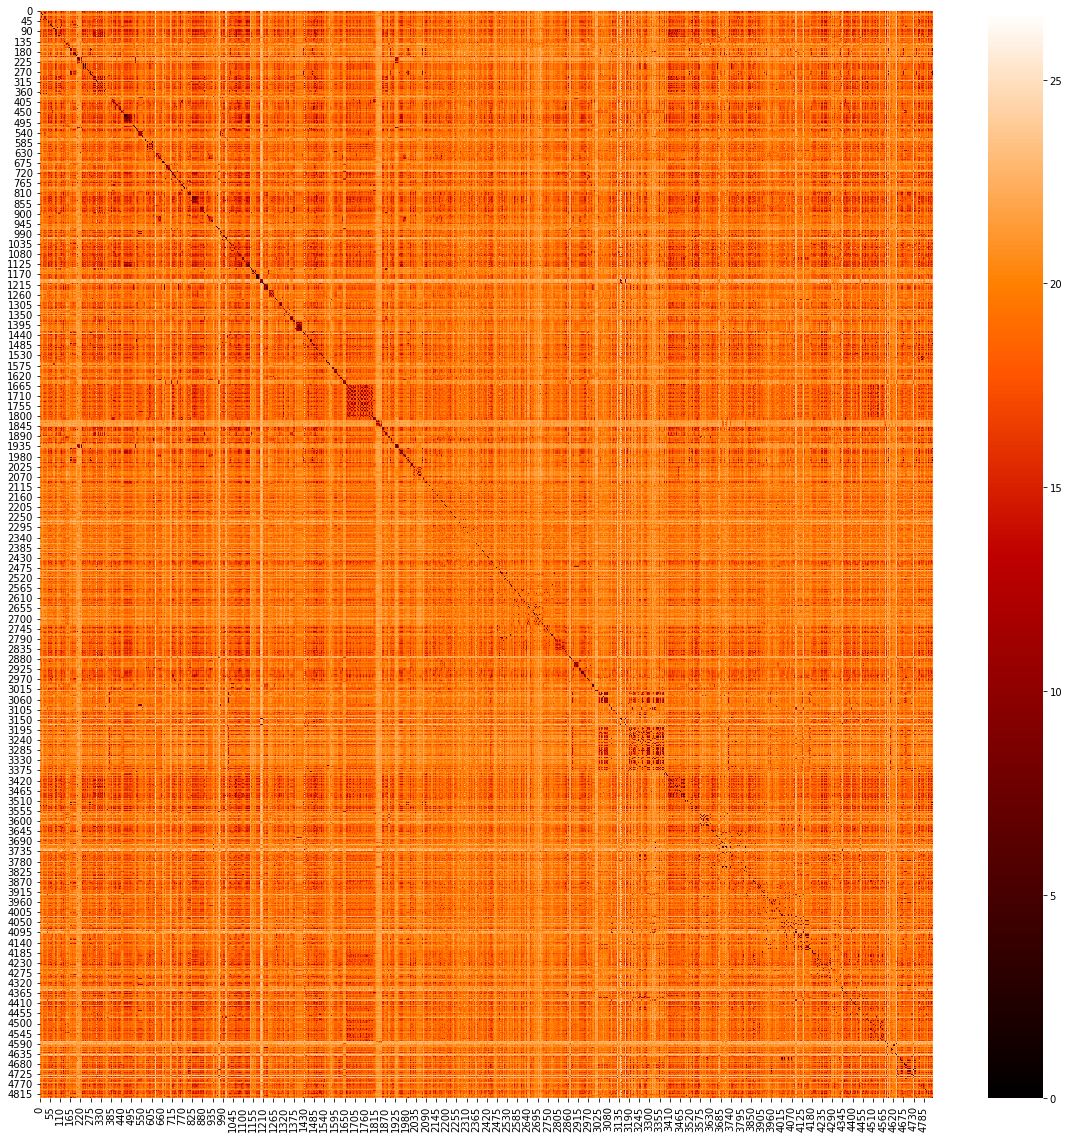

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# assume 'fingerprint_data' is a binary matrix of size (n_molecules, n_features)
# assume 'molecule_names' is a list of length n_molecules containing the names of the molecules

distances = squareform(pdist(X, metric='euclidean'))

# Create a larger figure with a larger heatmap
fig, ax = plt.subplots(figsize=(20, 20))
heatmap =sns.heatmap(distances, cmap='gist_heat',ax=ax)
# Show the plot
plt.show()

In [ ]:
dif=pd.DataFrame(distances)

In [ ]:
dif.to_csv('/content/drive/MyDrive/Project_Msc/Project_3/L_donovani_heatmap_dist.csv')

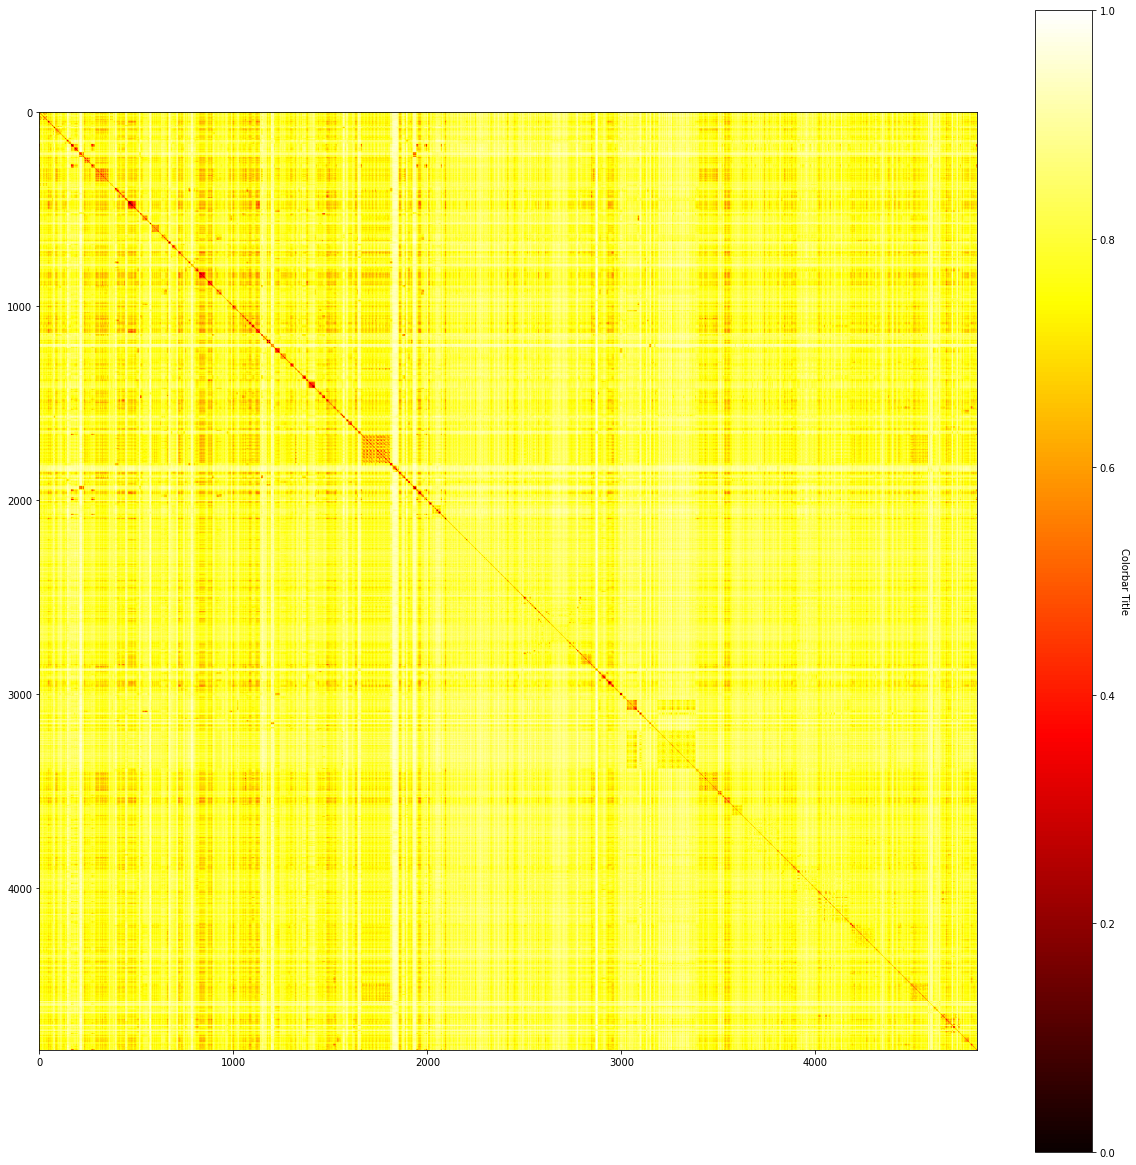

In [ ]:

# Create a larger figure with a single subplot
fig, ax = plt.subplots(figsize=(21, 21))

# Create a heatmap of the data
im= plt.imshow(distances_norm, cmap='hot',)

# Add a colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title of the colorbar
cbar.ax.set_ylabel('Colorbar Title', rotation=-90, va="bottom")

# Show the plot
plt.show()



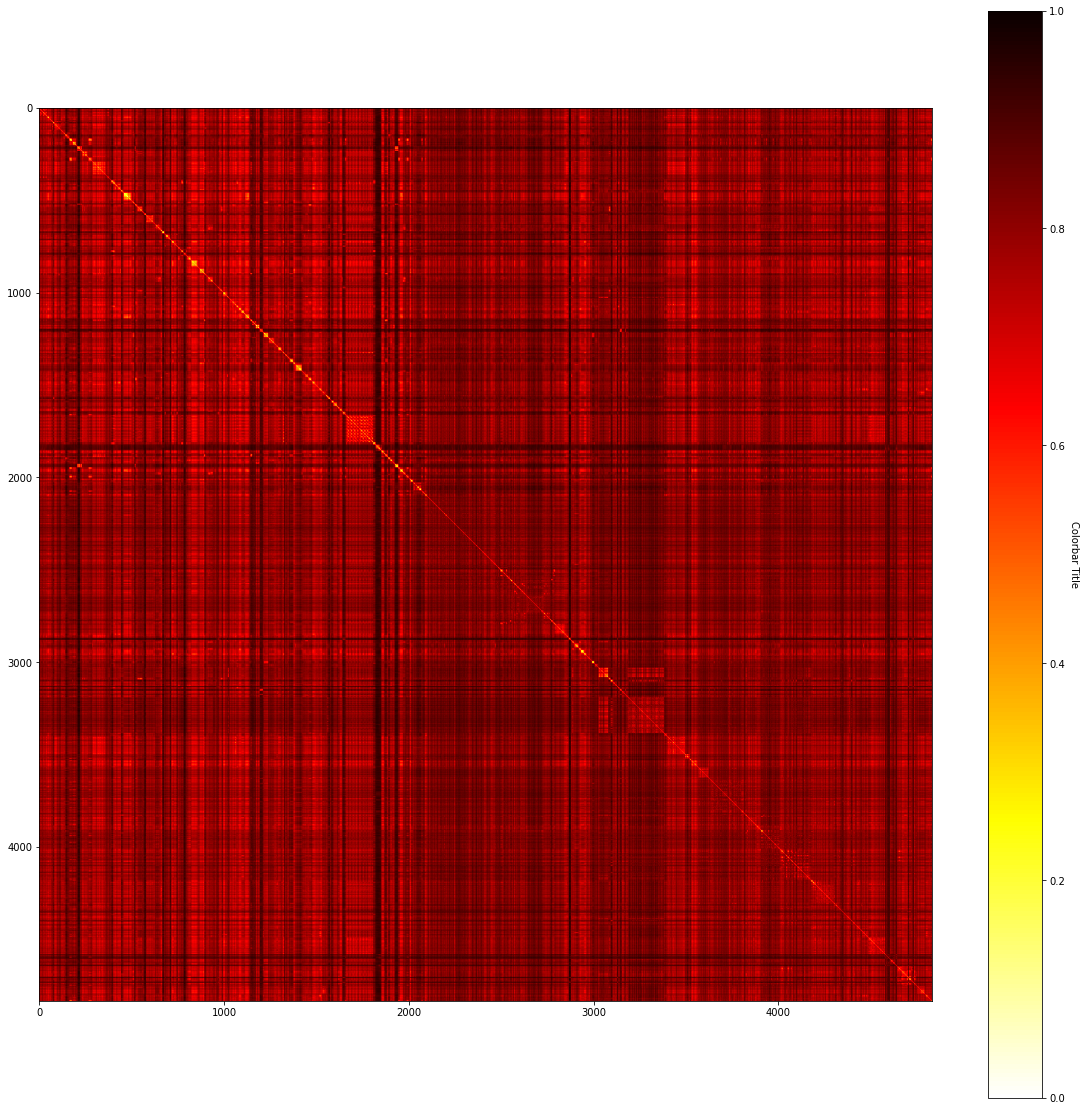

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D array of random data
data = distances_norm

# Create a larger figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 20))

# Create a reversed 'hot' colormap
cmap = plt.cm.get_cmap('hot_r')

# Create a heatmap of the data on the subplot using the reversed colormap
im = ax.imshow(data, cmap=cmap)

# Set the colorbar limits to match the range of the data
im.set_clim(vmin=data.min(), vmax=data.max())

# Add a colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title of the colorbar
cbar.ax.set_ylabel('Colorbar Title', rotation=-90, va="bottom")

# Show the plot
plt.show()


In [ ]:
plt.savefig("L_donovani_Heatmap_CDK.pdf")

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Apply z-score normalization to the data
scaler = MinMaxScaler()
distances_norm = scaler.fit_transform(distances)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.9* (1 - .9)))    
X = selection.fit_transform(df2)

In [ ]:
import numpy as np

In [ ]:
y

In [ ]:
y.unique_values()

In [ ]:
y=df['class']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data into a pandas DataFrame
# data = pd.read_csv("data.csv")

# Split the data into features and target label
# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]
# X=df2
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the k-means model to the training data with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict the labels on the test data
y_test_predict=kmeans.predict(X_train)
y_pred = kmeans.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5129265770423992


In [ ]:
X=X.astype(int)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# assume 'data' is a binary matrix of size (n_samples, n_features)
tsne = TSNE(n_components=0.95, perplexity=30, random_state=42)
embedded_data = tsne.fit_transform(X)

# 'embedded_data' is a 2D array of size (n_samples, 2) containing the embedded data

In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 47.0 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from scipy.cluster.hierarchy import dendrogram, linkage
from rdkit import DataStructs
import numpy as np
import matplotlib.pyplot as plt

# Define a list of SMILES strings for the molecules
smiles_list = ['CC(=O)OC1=CC=CC=C1C(=O)O', 'CC(C)(C)C1=CC=CC=C1C(=O)O', 'CC(=O)OC1=CC=CC=C1C(=O)C',
               'CC(=O)OC1=CC=CC=C1C(=O)CC', 'CC(=O)OC1=CC=CC=C1C(=O)OCC']

# Generate Morgan fingerprints for each molecule
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
fps = [AllChem.GetMorganFingerprint(mol,3,useFeatures=True) for mol in mols]

# Calculate the pairwise Tanimoto similarity between molecules
n_fps = len(fps)
similarity_matrix = np.zeros((n_fps, n_fps))
for i in range(n_fps):
    for j in range(i+1, n_fps):
        similarity_matrix[i,j] = similarity_matrix[j,i] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

# Perform hierarchical clustering using Scipy
linkage_matrix = linkage(similarity_matrix, method='ward')

# Plot the dendrogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, labels=smiles_list, orientation='top')
plt.title('Molecular Similarity Dendrogram')
plt.xlabel('Molecules')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Plot the heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(similarity_matrix, cmap='YlGnBu')
ax.set_xticks(np.arange(n_fps))
ax.set_yticks(np.arange(n_fps))
ax.set_xticklabels(smiles_list)
ax.set_yticklabels(smiles_list)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Tanimoto Similarity', rotation=-90, va="bottom")
plt.title('Molecular Similarity Heatmap')
plt.xlabel('Molecules')
plt.ylabel('Molecules')
plt.tight_layout()
plt.show()


In [ ]:
fps

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project_Msc/Project_3/Leishmania_donovani_bioactivity_data_2class_pIC50.csv')

In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd
from rdkit import DataStructs, Chem
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the CSV file containing the fingerprints
# df = pd.read_csv('fingerprints.csv')

# Convert the fingerprint strings to RDKit fingerprint objects
mols = [Chem.MolFromSmiles(smi) for smi in df['canonical_smiles']]
fps = [Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048) for mol in mols]

# Calculate the pairwise Tanimoto similarity between the fingerprints
n_fps = len(fps)
similarity_matrix = np.zeros((n_fps, n_fps))
for i in range(n_fps):
    for j in range(i+1, n_fps):
        similarity_matrix[i,j] = similarity_matrix[j,i] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
# dist_matrix = squareform(pdist(fps, lambda x,y: 1 - DataStructs.TanimotoSimilarity(x, y)))


In [ ]:

# Perform hierarchical clustering on the distance matrix
Z = linkage(similarity_matrix, 'ward')


In [ ]:
Z

array([[3.69100000e+03, 3.75900000e+03, 9.04434285e-01, 2.00000000e+00],
       [1.43800000e+03, 1.44100000e+03, 9.43090481e-01, 2.00000000e+00],
       [4.25000000e+03, 4.29300000e+03, 9.50552975e-01, 2.00000000e+00],
       ...,
       [9.65600000e+03, 9.66000000e+03, 5.29988717e+01, 3.74600000e+03],
       [9.66100000e+03, 9.66200000e+03, 6.02268534e+01, 4.34300000e+03],
       [9.65800000e+03, 9.66300000e+03, 6.38085763e+01, 4.83300000e+03]])

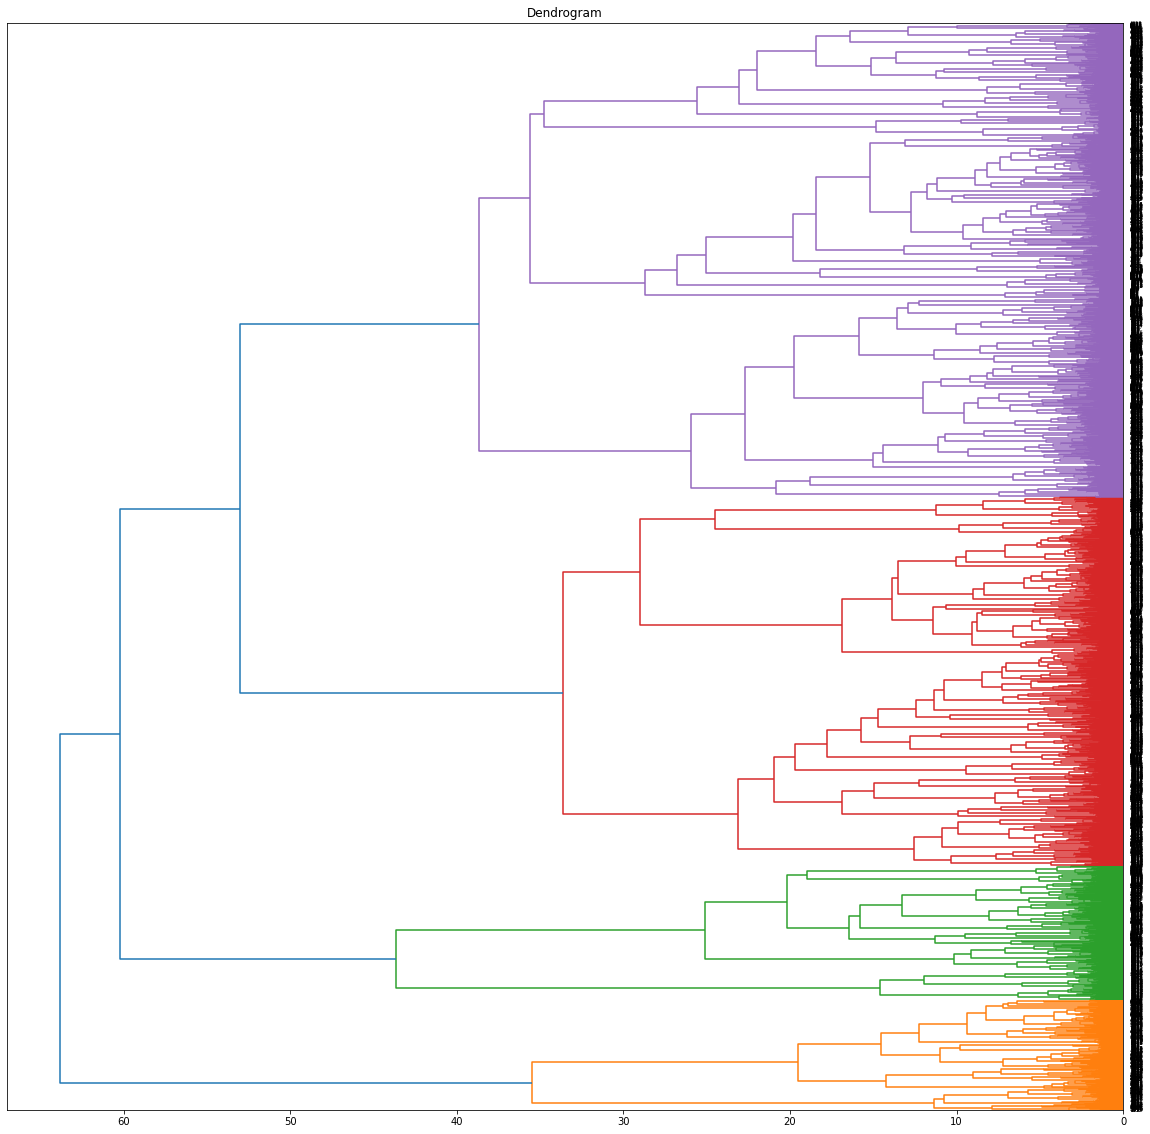

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Generate a random linkage array
# Z = shc.linkage(np.random.rand(10, 2))

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20,20))
dendrogram = shc.dendrogram(Z,orientation='left')
ax.set_title('Dendrogram')
plt.show()
plt.savefig('Dendogram_of_L_donovani_molecules.pdf')

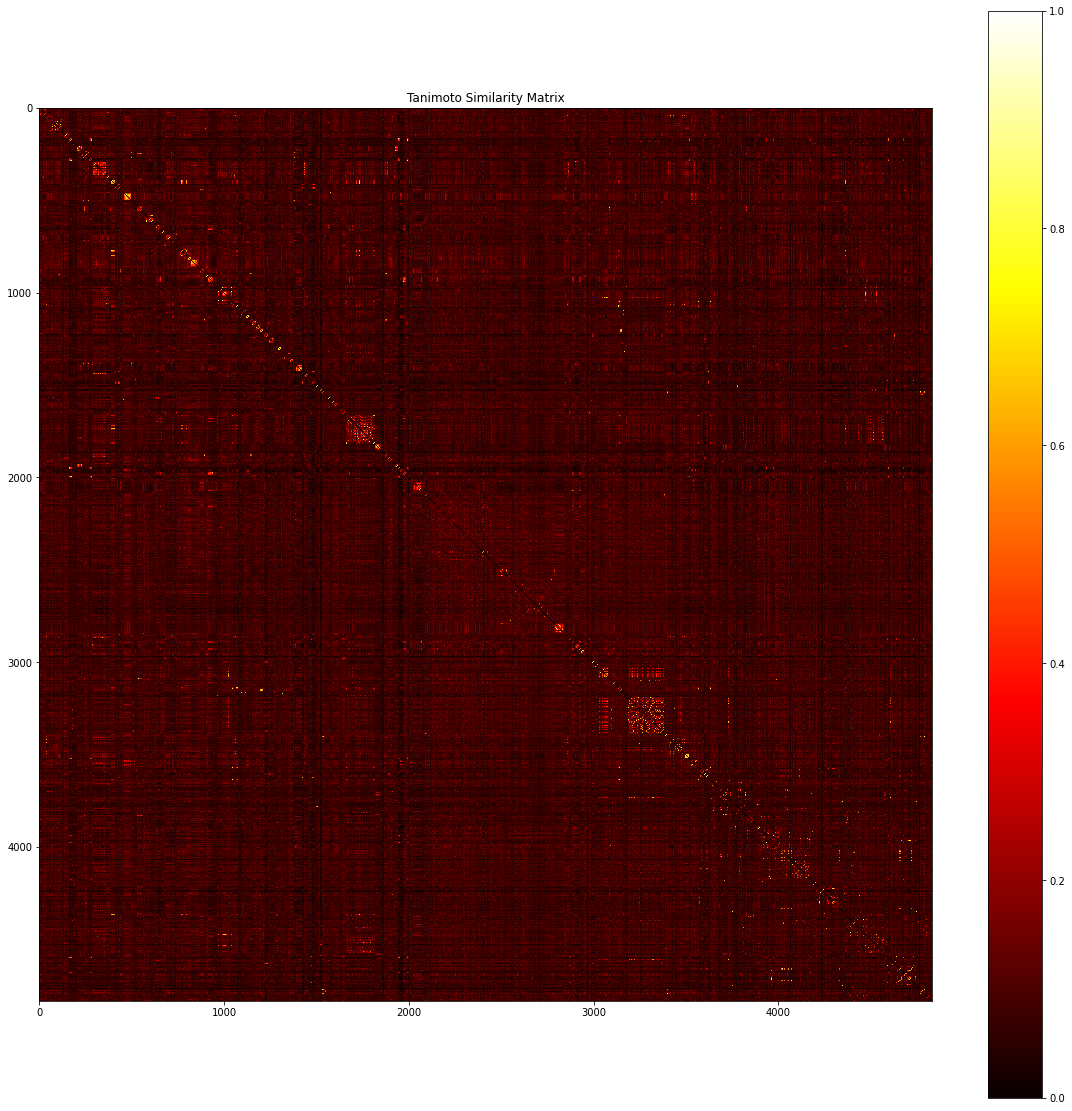

<Figure size 432x288 with 0 Axes>

In [ ]:

# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
ax.set_title('Tanimoto Similarity Matrix')
fig.colorbar(im)
plt.show()
plt.savefig('Heatmap_of_L_donovani_molecules.pdf')